In [2]:

"""%reset -f
import numpy as np
class GWSystem:
    """
    Made by doyeul from Korea & Eawha university
    Please provide only one of the parameters: a,fgw,Tkep, using ***km,Hz,or ms*** respectively
    
    This code assumes that m1= m2 = 35 solar mass
    Inside the code, quantities are in geometrized units (G = c = 1), with mass measured in solar masses.
    You don't need to worry about it! Easy to use!
    """
    def __init__(self,*,a=None,f=None,T=None):   #*는 순서입력x, 키워드 입력만 받음. None 은 데이터 없음. fgw, Tkep
        inputs = [a,f,T]
        count = sum(x is not None for x in inputs)   
        if count!=1:
            raise ValueError("please insert only one input among a,f,T")
        #define value
        m1=35
        m2=35
        M=m1+m2
        G=1
        c=1    
        G_c2=1.477  # G_c2=1.477km/M0
        G_c3=4.926e-3 # G_c3=4.926e-3ms/M0
        if a is not None:
            a_geo=a/G_c2
            T_geo=2*np.pi*np.sqrt(a_geo**3/G/M)
            f_geo=2/T_geo
        elif f is not None:
            f_geo=f*G_c3*1e-3   
            T_geo=2/f_geo    
            a_geo=np.cbrt(G*M*T_geo**2/4/np.pi**2)
        elif T is not None:
            T_geo=T/G_c3
            f_geo=2/T_geo
            a_geo=np.cbrt(G*M*T_geo**2/4/np.pi**2)
        self.a = a_geo * G_c2   #km
        self.f = f_geo/G_c3 /1e-3  #Hz   
        self.T=T_geo*G_c3    #ms
        """

IndentationError: unexpected indent (1022004275.py, line 5)

In [4]:
%reset -f
import numpy as np
class GWSystem:
    """
    Made by doyeul from Korea & Eawha university
    Please provide only one of the parameters: a,fgw,Tkep,m1,m2 using ***km,Hz,s or solar mass*** respectively
    here we use solar mass as the unit of mass
    """
    def __init__(self,*,a=None,f=None,T=None,m1=35.0,m2=35.0):    #*는 순서입력x, 키워드 입력만 받음. None 은 데이터 없음. fgw, Tkep
        inputs = [a,f,T]
        count = sum(x is not None for x in inputs)   
        if count!=1:
            raise ValueError("please insert only one input among a,f,T")
        #define value
        G=6.67428e-11 #Gravitational constant in mks unit system
        c=2.99792458e8 #speed of light in mks unit system
        M0=1.9891e30 #solar mass in mks unit system
        #mass of the star1 in solar mass   ,type=float64=double->significant figure~15
        #mass of the star2 in solar mass
        M=m1+m2   #total mass
        M_mks=M*M0
        if a is not None:
            a_mks=a*1000
            T_mks=2*np.pi*np.sqrt(a_mks**3/G/M_mks)
            f_mks=2/T_mks
        elif f is not None:
            f_mks=f 
            T_mks=2/f_mks
            a_mks=np.cbrt(G*M_mks*T_mks**2/4/np.pi**2)
        elif T is not None:
            T_mks=T
            f_mks=2/T_mks
            a_mks=np.cbrt(G*M_mks*T_mks**2/4/np.pi**2)
        self.a=a_mks*1e-3  #semi-major axis in km
        self.f=f_mks       #fgw in Hz
        self.T=T_mks       #Tkep in s
        

    

In [16]:
print(GWSystem.__doc__)


Made by doyeul from Korea & Eawha university
Please provide only one of the parameters: a,fgw,Tkep, using ***km,Hz,or s*** respectively
here we use solar mass as the unit of mass



In [17]:
s=GWSystem(a=350.)    #m1,m2에서 유효숫자 병목이 3자리로 생김.
print("a={0:.2e}km fgw={1:.2e}Hz Tkep={2:.2e}s".format(s.a,s.f,s.T))

a=3.50e+02km fgw=5.82e+01Hz Tkep=3.44e-02s


In [18]:
s=GWSystem(f=148.)   #isco frequency
print("a={0:.2e}km fgw={1:.2e}Hz Tkep={2:.2e}s".format(s.a,s.f,s.T))

a=1.88e+02km fgw=1.48e+02Hz Tkep=1.35e-02s


In [10]:
s=GWSystem(T=0.0135)
print("a={0:.2e}km fgw={1:.2e}Hz Tkep={2:.2e}s".format(s.a,s.f,s.T))

a=3.50e+02km fgw=1.48e+02Hz Tkep=1.35e-02s


BBH
final speed = 0.55c


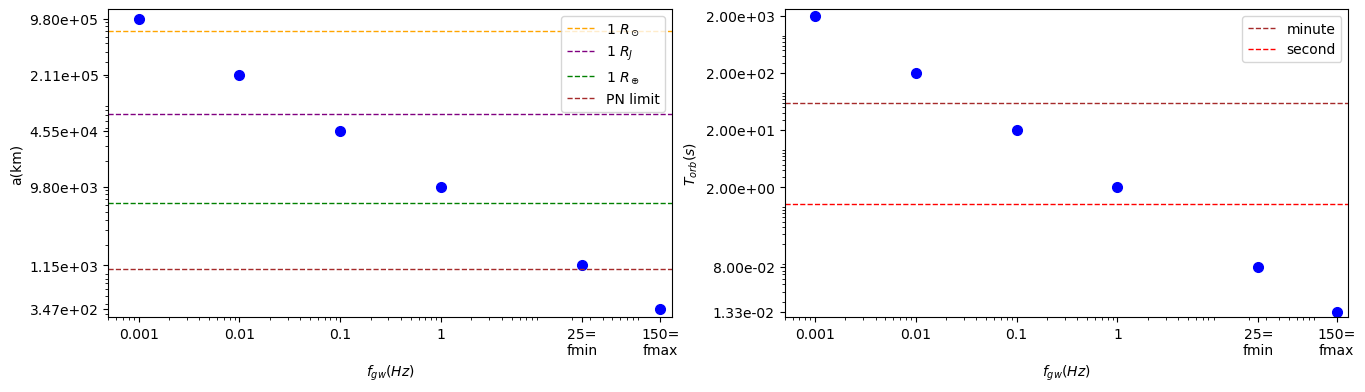

In [24]:
#GW150914 m1,m2=35,35, fmin=25, fmax~fisco=150
import numpy as np
import matplotlib.pyplot as plt
#trigger of GW
m1=35.0
m2=35.0
fmin=25.0
fmax=150.
#physical constant
c=2.99792458e8 #speed of light in mks unit system
R0_km = 6.95508e+5 # 태양 반지름
rs_km=2.95*m1   #m1>=m2 convention schwarzschild radius
PN_limit=10*rs_km  #PN 근사가능한 경계
Rearth_km=6371 # 지구 반지름
RJ_km=71500  #목성반지름
second=1  #
minute=60
hour=3600
solar_day=86400
Sidear_year=3.15581450e7 
#determine the compact binary system
if m1>=3 and m2>=3 :
    print('BBH')
elif m1>=3 and m2 <3:
    print('BHNS')
else:
    print('NSNS')


#fill the list to plot, using GWSystem class
flist=[0.001,0.01,0.1,1,fmin,fmax]
alist=[]
Tlist=[]
for i in flist:
    s=GWSystem(f=i,m1=m1,m2=m1)
    alist.append(s.a)
for i in flist:
    s=GWSystem(f=i)
    Tlist.append(s.T)
#make list for x,y ticks' labels
fticks=[0.001,0.01,0.1,1,fmin,fmax]
aticks=[]
Tticks=[]
for i in fticks:
    s=GWSystem(f=i,m1=m1,m2=m2)
    aticks.append(s.a)
    Tticks.append(s.T)

#make figure
plt.rc('text', usetex=False) # matplotlib 내장 latex이용.
fig=plt.figure(figsize=(16,4)) #가로,세로 크기.
 #pad 크기 키워서 subplot 띄워놓기.(tight는 auto로 어느정도 맞춰주는기능)
plt.subplots_adjust(wspace=0.2) #가로간격 띄우기
#make subplot1 : a-f 
ax1=fig.add_subplot(121)
ax1.plot(flist,alist,linestyle='None',marker='o',markersize=7,c='b')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$f_{gw}(Hz)$')
ax1.set_ylabel('a(km)')
ax1.set_xlim(0.0005,max(fticks)*1.3)
ax1.set_ylim(min(aticks)*0.8,max(aticks)*1.3)
a_lowerlim,a_upperlim = ax1.get_ylim()
#subplot1's x,y축 tick 라벨 생성
ax1.set_xticks(fticks)
xtick_labels=['0.001','0.01','0.1','1','{:.0f}=\nfmin'.format(fmin),'{:.0f}=\nfmax'.format(fmax)]
ax1.set_xticklabels(xtick_labels,fontsize=10)
ax1.set_yticks(aticks)
ytick_labels=['{:.2e}'.format(k) for k in aticks]
ax1.set_yticklabels(ytick_labels,fontsize=10)
ax1.grid(False) #자동 그리드 = 라벨에 다 붙음. 끄기
#subplot1's 수평참조선
if R0_km>=a_lowerlim and R0_km<=a_upperlim:
    ax1.axhline(y=R0_km, color='orange', linestyle='--', linewidth=1, label='1 $R_\\odot$')  
if RJ_km>=a_lowerlim and RJ_km<=a_upperlim:
    ax1.axhline(y=RJ_km, color='purple', linestyle='--', linewidth=1, label='1 $R_J$')  
if Rearth_km >= a_lowerlim and Rearth_km <= a_upperlim:
    ax1.axhline(y=Rearth_km, color='green', linestyle='--', linewidth=1, label=r'1 $R_\oplus$')  
if PN_limit >= a_lowerlim and PN_limit <= a_upperlim:
    ax1.axhline(y=PN_limit, color='brown', linestyle='--', linewidth=1, label=r'PN limit')  
if rs_km >= a_lowerlim and rs_km <= a_upperlim:
    ax1.axhline(y=rs_km, color='red', linestyle='--', linewidth=1, label='1 $r_s$')  

# 범례 추가
ax1.legend(loc='upper right')  #label 이 지정된 데이터요소 띄워줌.

#make subplot : T-f
ax2=fig.add_subplot(122)
ax2.plot(flist,Tlist,linestyle='None',marker='o',markersize=7,c='b')
ax2.set_xlabel(r'$f_{gw}(Hz)$')
ax2.set_ylabel(r'$T_{orb}(s)$')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(0.0005,max(fticks)*1.3)
ax2.set_ylim(min(Tticks)*0.8,max(Tticks)*1.3)
T_lowerlim,T_upperlim=ax2.get_ylim()
#subplot2's 라벨 생성
ax2.set_xticks(fticks)
xtick_labels=['0.001','0.01','0.1','1','{:.0f}=\nfmin'.format(fmin),'{:.0f}=\nfmax'.format(fmax)]
ax2.set_xticklabels(xtick_labels,fontsize=10)
ax2.set_yticks(Tticks)
ytick_labels=['{:.2e}'.format(k) for k in Tticks]
ax2.set_yticklabels(ytick_labels,fontsize=10)
ax2.grid(False)   #자동 그리드 = 라벨에 다 붙음. 끄기
#subplot2's 수평참조선
if Sidear_year >= T_lowerlim and Sidear_year <= T_upperlim:
    ax2.axhline(y=Sidear_year, color='orange', linestyle='--', linewidth=1, label='Sidear year')  
if solar_day >= T_lowerlim and solar_day <= T_upperlim:
    ax2.axhline(y=solar_day, color='purple', linestyle='--', linewidth=1, label='solar day')  
if hour >= T_lowerlim and hour <= T_upperlim:
    ax2.axhline(y=hour, color='green', linestyle='--', linewidth=1, label='hour')  
if minute >= T_lowerlim and minute <= T_upperlim:
    ax2.axhline(y=minute, color='brown', linestyle='--', linewidth=1, label='minute')  
if second >= T_lowerlim and second <= T_upperlim:
    ax2.axhline(y=second, color='red', linestyle='--', linewidth=1, label='second')  

# 범례 추가
ax2.legend(loc='upper right')  #label 이 지정된 데이터요소 띄워줌.
#final speed
print("final speed = {:.2f}c".format(2*np.pi*min(aticks)*1000/min(Tticks)/c))

plt.show()


NSNS
final speed = 0.44c


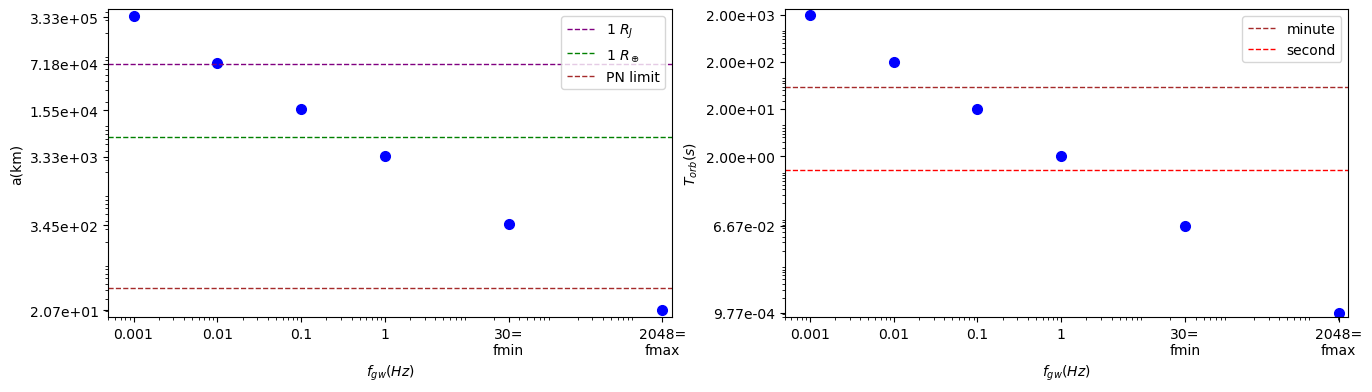

In [23]:
#GW170817 m1,m2=1.48,1.27, fmin=30, fmax~fisco=2048
import numpy as np
import matplotlib.pyplot as plt
#trigger of GW
m1=1.48
m2=1.27
fmin=30.0
fmax=2048
#physical constant
c=2.99792458e8 #speed of light in mks unit system
R0_km = 6.95508e+5 # 태양 반지름
rs_km=2.95*m1   #m1>=m2 convention schwarzschild radius
PN_limit=10*rs_km  #PN 근사가능한 경계
Rearth_km=6371 # 지구 반지름
RJ_km=71500  #목성반지름
second=1  #
minute=60
hour=3600
solar_day=86400
Sidear_year=3.15581450e7 
#determine the compact binary system
if m1>=3 and m2>=3 :
    print('BBH')
elif m1>=3 and m2 <3:
    print('BHNS')
else:
    print('NSNS')


#fill the list to plot, using GWSystem class
flist=[0.001,0.01,0.1,1,fmin,fmax]
alist=[]
Tlist=[]
for i in flist:
    s=GWSystem(f=i,m1=m1,m2=m1)
    alist.append(s.a)
for i in flist:
    s=GWSystem(f=i)
    Tlist.append(s.T)
#make list for x,y ticks' labels
fticks=[0.001,0.01,0.1,1,fmin,fmax]
aticks=[]
Tticks=[]
for i in fticks:
    s=GWSystem(f=i,m1=m1,m2=m2)
    aticks.append(s.a)
    Tticks.append(s.T)

#make figure
plt.rc('text', usetex=False) # matplotlib 내장 latex이용.
fig=plt.figure(figsize=(16,4)) #가로,세로 크기.
 #pad 크기 키워서 subplot 띄워놓기.(tight는 auto로 어느정도 맞춰주는기능)
plt.subplots_adjust(wspace=0.2) #가로간격 띄우기
#make subplot1 : a-f 
ax1=fig.add_subplot(121)
ax1.plot(flist,alist,linestyle='None',marker='o',markersize=7,c='b')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$f_{gw}(Hz)$')
ax1.set_ylabel('a(km)')
ax1.set_xlim(0.0005,max(fticks)*1.3)
ax1.set_ylim(min(aticks)*0.8,max(aticks)*1.3)
a_lowerlim,a_upperlim = ax1.get_ylim()
#subplot1's x,y축 tick 라벨 생성
ax1.set_xticks(fticks)
xtick_labels=['0.001','0.01','0.1','1','{:.0f}=\nfmin'.format(fmin),'{:.0f}=\nfmax'.format(fmax)]
ax1.set_xticklabels(xtick_labels,fontsize=10)
ax1.set_yticks(aticks)
ytick_labels=['{:.2e}'.format(k) for k in aticks]
ax1.set_yticklabels(ytick_labels,fontsize=10)
ax1.grid(False) #자동 그리드 = 라벨에 다 붙음. 끄기
#subplot1's 수평참조선
if R0_km>=a_lowerlim and R0_km<=a_upperlim:
    ax1.axhline(y=R0_km, color='orange', linestyle='--', linewidth=1, label='1 $R_\\odot$')  
if RJ_km>=a_lowerlim and RJ_km<=a_upperlim:
    ax1.axhline(y=RJ_km, color='purple', linestyle='--', linewidth=1, label='1 $R_J$')  
if Rearth_km >= a_lowerlim and Rearth_km <= a_upperlim:
    ax1.axhline(y=Rearth_km, color='green', linestyle='--', linewidth=1, label=r'1 $R_\oplus$')  
if PN_limit >= a_lowerlim and PN_limit <= a_upperlim:
    ax1.axhline(y=PN_limit, color='brown', linestyle='--', linewidth=1, label=r'PN limit')  
if rs_km >= a_lowerlim and rs_km <= a_upperlim:
    ax1.axhline(y=rs_km, color='red', linestyle='--', linewidth=1, label='1 $r_s$')  

# 범례 추가
ax1.legend(loc='upper right')  #label 이 지정된 데이터요소 띄워줌.

#make subplot : T-f
ax2=fig.add_subplot(122)
ax2.plot(flist,Tlist,linestyle='None',marker='o',markersize=7,c='b')
ax2.set_xlabel(r'$f_{gw}(Hz)$')
ax2.set_ylabel(r'$T_{orb}(s)$')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(0.0005,max(fticks)*1.3)
ax2.set_ylim(min(Tticks)*0.8,max(Tticks)*1.3)
T_lowerlim,T_upperlim=ax2.get_ylim()
#subplot2's 라벨 생성
ax2.set_xticks(fticks)
xtick_labels=['0.001','0.01','0.1','1','{:.0f}=\nfmin'.format(fmin),'{:.0f}=\nfmax'.format(fmax)]
ax2.set_xticklabels(xtick_labels,fontsize=10)
ax2.set_yticks(Tticks)
ytick_labels=['{:.2e}'.format(k) for k in Tticks]
ax2.set_yticklabels(ytick_labels,fontsize=10)
ax2.grid(False)   #자동 그리드 = 라벨에 다 붙음. 끄기
#subplot2's 수평참조선
if Sidear_year >= T_lowerlim and Sidear_year <= T_upperlim:
    ax2.axhline(y=Sidear_year, color='orange', linestyle='--', linewidth=1, label='Sidear year')  
if solar_day >= T_lowerlim and solar_day <= T_upperlim:
    ax2.axhline(y=solar_day, color='purple', linestyle='--', linewidth=1, label='solar day')  
if hour >= T_lowerlim and hour <= T_upperlim:
    ax2.axhline(y=hour, color='green', linestyle='--', linewidth=1, label='hour')  
if minute >= T_lowerlim and minute <= T_upperlim:
    ax2.axhline(y=minute, color='brown', linestyle='--', linewidth=1, label='minute')  
if second >= T_lowerlim and second <= T_upperlim:
    ax2.axhline(y=second, color='red', linestyle='--', linewidth=1, label='second')  

# 범례 추가
ax2.legend(loc='upper right')  #label 이 지정된 데이터요소 띄워줌.


#final speed
print("final speed = {:.2f}c".format(2*np.pi*min(aticks)*1000/min(Tticks)/c))

plt.show()


BHNS
final speed = 0.44c


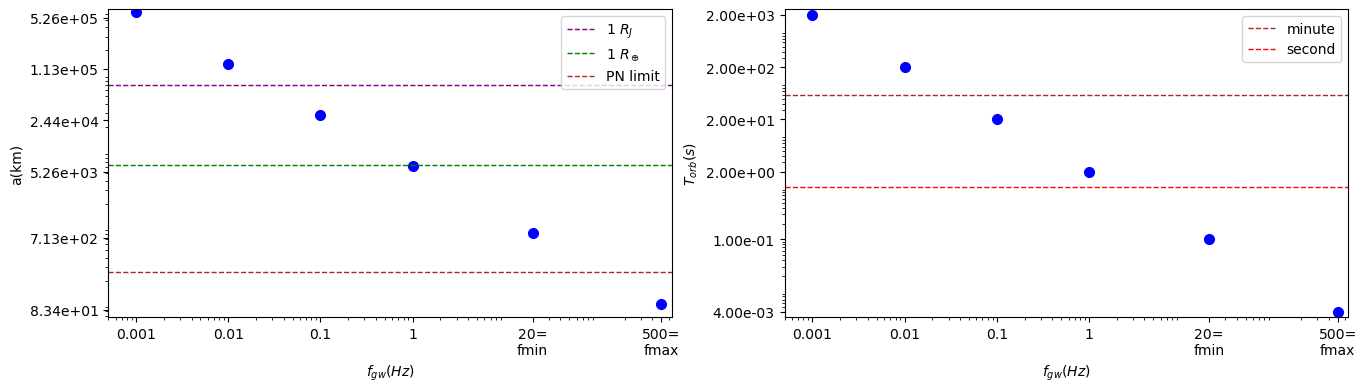

In [25]:
#GW200105 m1,m2=8.9, 1.9, fmin=20, fmax~fisco~500
import numpy as np
import matplotlib.pyplot as plt
#trigger of GW
m1=8.90
m2=1.90
fmin=20.0
fmax=500
#physical constant
c=2.99792458e8 #speed of light in mks unit system
R0_km = 6.95508e+5 # 태양 반지름
rs_km=2.95*m1   #m1>=m2 convention schwarzschild radius
PN_limit=10*rs_km  #PN 근사가능한 경계
Rearth_km=6371 # 지구 반지름
RJ_km=71500  #목성반지름
second=1  #
minute=60
hour=3600
solar_day=86400
Sidear_year=3.15581450e7 
#determine the compact binary system
if m1>=3 and m2>=3 :
    print('BBH')
elif m1>=3 and m2 <3:
    print('BHNS')
else:
    print('NSNS')


#fill the list to plot, using GWSystem class
flist=[0.001,0.01,0.1,1,fmin,fmax]
alist=[]
Tlist=[]
for i in flist:
    s=GWSystem(f=i,m1=m1,m2=m1)
    alist.append(s.a)
for i in flist:
    s=GWSystem(f=i)
    Tlist.append(s.T)
#make list for x,y ticks' labels
fticks=[0.001,0.01,0.1,1,fmin,fmax]
aticks=[]
Tticks=[]
for i in fticks:
    s=GWSystem(f=i,m1=m1,m2=m2)
    aticks.append(s.a)
    Tticks.append(s.T)

#make figure
plt.rc('text', usetex=False) # matplotlib 내장 latex이용.
fig=plt.figure(figsize=(16,4)) #가로,세로 크기.
 #pad 크기 키워서 subplot 띄워놓기.(tight는 auto로 어느정도 맞춰주는기능)
plt.subplots_adjust(wspace=0.2) #가로간격 띄우기
#make subplot1 : a-f 
ax1=fig.add_subplot(121)
ax1.plot(flist,alist,linestyle='None',marker='o',markersize=7,c='b')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$f_{gw}(Hz)$')
ax1.set_ylabel('a(km)')
ax1.set_xlim(0.0005,max(fticks)*1.3)
ax1.set_ylim(min(aticks)*0.8,max(aticks)*1.3)
a_lowerlim,a_upperlim = ax1.get_ylim()
#subplot1's x,y축 tick 라벨 생성
ax1.set_xticks(fticks)
xtick_labels=['0.001','0.01','0.1','1','{:.0f}=\nfmin'.format(fmin),'{:.0f}=\nfmax'.format(fmax)]
ax1.set_xticklabels(xtick_labels,fontsize=10)
ax1.set_yticks(aticks)
ytick_labels=['{:.2e}'.format(k) for k in aticks]
ax1.set_yticklabels(ytick_labels,fontsize=10)
ax1.grid(False) #자동 그리드 = 라벨에 다 붙음. 끄기
#subplot1's 수평참조선
if R0_km>=a_lowerlim and R0_km<=a_upperlim:
    ax1.axhline(y=R0_km, color='orange', linestyle='--', linewidth=1, label='1 $R_\\odot$')  
if RJ_km>=a_lowerlim and RJ_km<=a_upperlim:
    ax1.axhline(y=RJ_km, color='purple', linestyle='--', linewidth=1, label='1 $R_J$')  
if Rearth_km >= a_lowerlim and Rearth_km <= a_upperlim:
    ax1.axhline(y=Rearth_km, color='green', linestyle='--', linewidth=1, label=r'1 $R_\oplus$')  
if PN_limit >= a_lowerlim and PN_limit <= a_upperlim:
    ax1.axhline(y=PN_limit, color='brown', linestyle='--', linewidth=1, label=r'PN limit')  
if rs_km >= a_lowerlim and rs_km <= a_upperlim:
    ax1.axhline(y=rs_km, color='red', linestyle='--', linewidth=1, label='1 $r_s$')  

# 범례 추가
ax1.legend(loc='upper right')  #label 이 지정된 데이터요소 띄워줌.

#make subplot : T-f
ax2=fig.add_subplot(122)
ax2.plot(flist,Tlist,linestyle='None',marker='o',markersize=7,c='b')
ax2.set_xlabel(r'$f_{gw}(Hz)$')
ax2.set_ylabel(r'$T_{orb}(s)$')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(0.0005,max(fticks)*1.3)
ax2.set_ylim(min(Tticks)*0.8,max(Tticks)*1.3)
T_lowerlim,T_upperlim=ax2.get_ylim()
#subplot2's 라벨 생성
ax2.set_xticks(fticks)
xtick_labels=['0.001','0.01','0.1','1','{:.0f}=\nfmin'.format(fmin),'{:.0f}=\nfmax'.format(fmax)]
ax2.set_xticklabels(xtick_labels,fontsize=10)
ax2.set_yticks(Tticks)
ytick_labels=['{:.2e}'.format(k) for k in Tticks]
ax2.set_yticklabels(ytick_labels,fontsize=10)
ax2.grid(False)   #자동 그리드 = 라벨에 다 붙음. 끄기
#subplot2's 수평참조선
if Sidear_year >= T_lowerlim and Sidear_year <= T_upperlim:
    ax2.axhline(y=Sidear_year, color='orange', linestyle='--', linewidth=1, label='Sidear year')  
if solar_day >= T_lowerlim and solar_day <= T_upperlim:
    ax2.axhline(y=solar_day, color='purple', linestyle='--', linewidth=1, label='solar day')  
if hour >= T_lowerlim and hour <= T_upperlim:
    ax2.axhline(y=hour, color='green', linestyle='--', linewidth=1, label='hour')  
if minute >= T_lowerlim and minute <= T_upperlim:
    ax2.axhline(y=minute, color='brown', linestyle='--', linewidth=1, label='minute')  
if second >= T_lowerlim and second <= T_upperlim:
    ax2.axhline(y=second, color='red', linestyle='--', linewidth=1, label='second')  

# 범례 추가
ax2.legend(loc='upper right')  #label 이 지정된 데이터요소 띄워줌.


#final speed
print("final speed = {:.2f}c".format(2*np.pi*min(aticks)*1000/min(Tticks)/c))

plt.show()
